In [1]:
#Import Dependencies

import pandas as pd
import matplotlib.pyplot as plt
import glob, os
import random
import scipy.stats as sts
import gmaps 
from scipy.stats import linregress
from yelpapi import YelpAPI
from pprint import pprint
from config import gkey
from config import yelp_api_key
 
os.chdir('Resources')
results = pd.DataFrame([])
 
for counter, file in enumerate(glob.glob("bls_qcew_maps_excel-*")):
    namedf = pd.read_csv(file, skiprows=3)
    results = results.append(namedf)
 
results.to_csv('combinedfile.csv')



In [2]:
#Format DataFrame
CountyIncome = pd.read_csv('combinedfile.csv')
CountyIncome = CountyIncome.rename(columns = {'USPS':'State', 
                                             'Area Name': 'County'})
#CountyIncome=CountyIncome.set_index('State')
CountyIncome = CountyIncome.drop(columns=['Unnamed: 0','FIPS', 'Quarter', 'Industry'])
CountyIncome.head()





,County,Year,No Of Establishments,Employment,One-Year Employment Gain/Loss (Percent),Average Weekly Wages,On-Year Weekly Wages Gain/Loss (Percent),State
0,Allegany County,2019.0,1564.0,29113.0,0.3,751.0,2.6,MD
1,Anne Arundel County,2019.0,15384.0,270523.0,0.3,1194.0,3.2,MD
2,Baltimore County,2019.0,21389.0,378706.0,0.5,1122.0,1.2,MD
3,Calvert County,2019.0,1886.0,22805.0,-0.3,988.0,-0.3,MD
4,Caroline County,2019.0,687.0,9993.0,2.4,831.0,4.8,MD


In [3]:
#Add Coordinates to Data Frame
coordinates = pd.read_csv("../Coordinates/county_coordinates.csv")
coordinates = coordinates.drop(columns=["USPS", "GEOID"])
CountyIncome = CountyIncome.merge(coordinates, left_index=False)
CountyIncome.head()

,County,Year,No Of Establishments,Employment,One-Year Employment Gain/Loss (Percent),Average Weekly Wages,On-Year Weekly Wages Gain/Loss (Percent),State,ANSICODE,ALAND,AWATER,ALAND_SQMI,AWATER_SQMI,Latitude,Longitude
0,Allegany County,2019.0,1564.0,29113.0,0.3,751.0,2.6,MD,1713506,1.093458e+09,14805576,422.186,5.716,39.612313,-78.703104
1,Allegany County,2019.0,1564.0,29113.0,0.3,751.0,2.6,MD,974100,2.666030e+09,12999275,1029.360,5.019,42.247853,-78.026153
2,Allegany County,2019.0,919.0,13174.0,-1.7,741.0,1.2,NY,1713506,1.093458e+09,14805576,422.186,5.716,39.612313,-78.703104
3,Allegany County,2019.0,919.0,13174.0,-1.7,741.0,1.2,NY,974100,2.666030e+09,12999275,1029.360,5.019,42.247853,-78.026153
4,Anne Arundel County,2019.0,15384.0,270523.0,0.3,1194.0,3.2,MD,1710958,1.074287e+09,448099595,414.785,173.012,38.991610,-76.560731


In [4]:
#Add Column and State Data Frame
CountyIncome_randomdf = CountyIncome.sample(n = 100) 
CountyIncome_randomdf['County and State'] = (CountyIncome_randomdf["County"] + ", " + CountyIncome_randomdf["State"])
CountyIncome_randomdf.head()



,County,Year,No Of Establishments,Employment,One-Year Employment Gain/Loss (Percent),Average Weekly Wages,On-Year Weekly Wages Gain/Loss (Percent),State,ANSICODE,ALAND,AWATER,ALAND_SQMI,AWATER_SQMI,Latitude,Longitude,County and State
9742,Wood County,2019.0,3074.0,67423.0,2.8,934.0,-1.7,OH,1384035,1.671177e+09,130725856,645.245,50.474,32.783588,-95.382166,"Wood County, OH"
13526,Cedar County,2019.0,579.0,5308.0,-1.6,755.0,2.0,IA,835835,1.917220e+09,14513816,740.243,5.604,42.604560,-97.256870,"Cedar County, IA"
13386,Oldham County,2019.0,1652.0,15994.0,0.7,870.0,4.6,KY,1383965,3.886337e+09,2339716,1500.523,0.903,35.401921,-102.597620,"Oldham County, KY"
7482,Wayne County,2019.0,2314.0,42139.0,0.5,738.0,5.4,NC,350608,1.662610e+09,17766411,641.937,6.860,31.547845,-81.912376,"Wayne County, NC"
1235,Washington County,2019.0,973.0,14858.0,0.5,756.0,0.1,TX,1209190,2.219591e+09,10147675,856.989,3.918,40.200005,-80.252132,"Washington County, TX"


In [5]:
#Search Through Yelp API for Fast Food Restaurants in Counties
yelp_api = YelpAPI(yelp_api_key)
total_fastfood = []
for county in CountyIncome_randomdf['County and State']:
    
    search_results = yelp_api.search_query(term = 'fast food', location = county)
    total_fastfood.append(search_results['total'])
    
len(total_fastfood)
print(total_fastfood)

[588, 420, 763, 1300, 1000, 1200, 469, 56, 12, 774, 494, 347, 128, 94, 1500, 1200, 77, 2000, 1700, 215, 57, 221, 525, 12, 1300, 43, 134, 18, 2900, 208, 273, 99, 238, 1900, 157, 878, 146, 1000, 538, 155, 11, 93, 696, 63, 873, 35, 714, 419, 361, 202, 40, 189, 1700, 25, 482, 136, 101, 732, 680, 101, 181, 921, 321, 989, 195, 202, 268, 45, 7, 37, 137, 470, 23, 873, 182, 346, 23, 446, 34, 17, 71, 318, 4800, 32, 10, 199, 574, 905, 478, 129, 200, 131, 581, 1100, 570, 5, 491, 989, 2400, 348]


In [6]:
County_and_State = CountyIncome_randomdf['County and State']
Average_Weekly_Wages = CountyIncome_randomdf['Average Weekly Wages']

In [7]:
#Format DataFrame
County_FastFood_df = pd.DataFrame({"Counties" : County_and_State, "Total Fast Food Restaurants" : total_fastfood, 'Average Weekly Wages' : Average_Weekly_Wages })
County_FastFood_df.head()

,Counties,Total Fast Food Restaurants,Average Weekly Wages
9742,"Wood County, OH",588,934.0
13526,"Cedar County, IA",420,755.0
13386,"Oldham County, KY",763,870.0
7482,"Wayne County, NC",1300,738.0
1235,"Washington County, TX",1000,756.0


In [8]:
#Set Index to Search Through Counties
County_FastFood_df_indexed = County_FastFood_df.set_index('Counties')

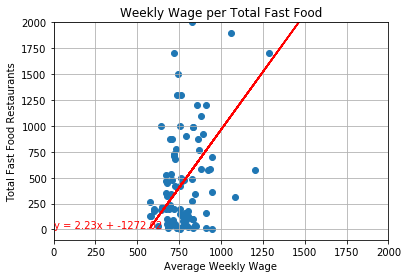

The correlation coefficient between Average Weekly Wages and Total Fast Food Restaurants is 0.76
The P-Value between Average Weekly Wages and Total Fast Food Restaurants is 0.0


<Figure size 432x288 with 0 Axes>

In [16]:
#Scatter Plot and Linear Regression of Average Weekly Wages and Total Fast Food Restaurants
x_axis = County_FastFood_df["Average Weekly Wages"]
y_axis = County_FastFood_df["Total Fast Food Restaurants"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(5,10),fontsize=10,color="red")
plt.title("Weekly Wage per Total Fast Food")
plt.xlabel("Average Weekly Wage")
plt.ylabel("Total Fast Food Restaurants")
plt.xlim(0, 2000)
plt.ylim(-100, 2000)
plt.grid(True)
plt.show()

import scipy.stats as st
AWW = County_FastFood_df_indexed['Average Weekly Wages']
TotalFastFood = County_FastFood_df_indexed['Total Fast Food Restaurants']

print(f"The correlation coefficient between Average Weekly Wages and Total Fast Food Restaurants is {round(st.pearsonr(AWW,TotalFastFood)[0],2)}")
print(f"The P-Value between Average Weekly Wages and Total Fast Food Restaurants is {round(st.pearsonr(AWW,TotalFastFood)[1],4)}")
plt.savefig("../output/WeeklyWageperTotalFastFood.png")

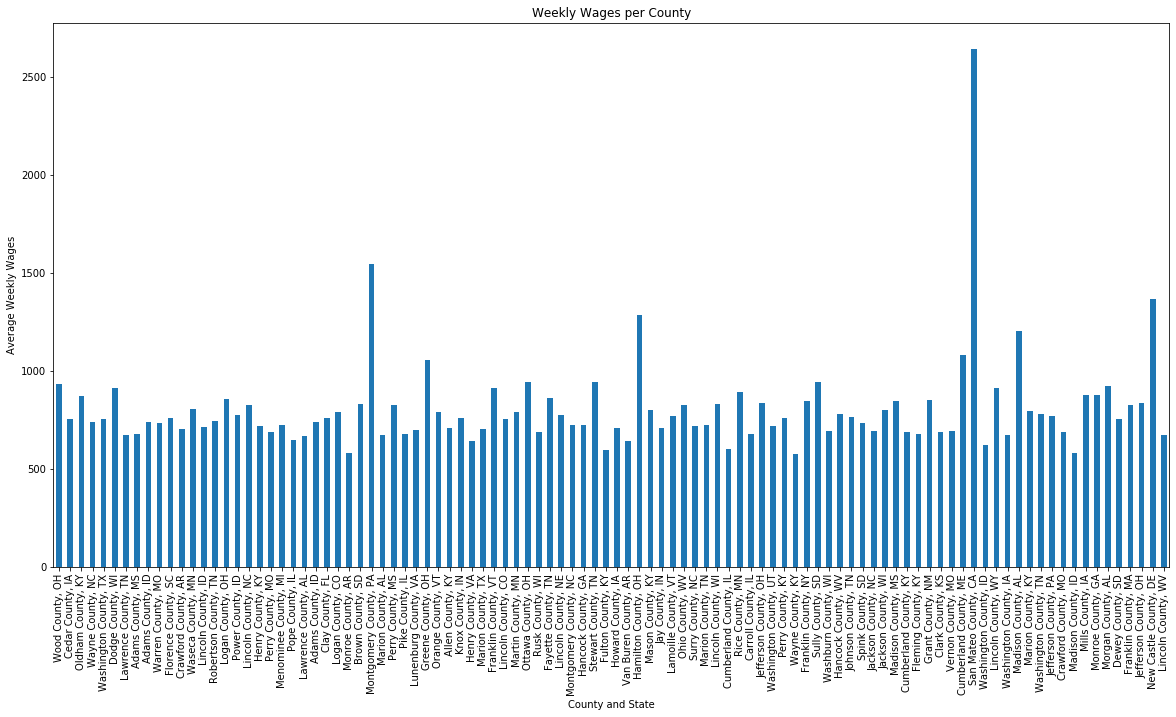

In [10]:
#Bar Chart of Total Restaurants in Counties
County_FastFood_df_indexed["Average Weekly Wages"].plot(kind="bar", figsize=(20,10))
plt.xlabel("County and State")
plt.ylabel("Average Weekly Wages")
plt.title("Weekly Wages per County")
plt.savefig("../output/WeeklyWagesperCounty.png")

In [11]:
#Find Potential Outliers
Average_Weekly_Wages =County_FastFood_df_indexed['Average Weekly Wages'].astype(int)

quartiles = County_FastFood_df_indexed["Average Weekly Wages"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 695.0
The upper quartile of temperatures is: 834.0
The interquartile range of temperatures is: 139.0
The the median of temperatures is: 757.0 
Values below 486.5 could be outliers.
Values above 1042.5 could be outliers.


In [12]:
outlier_ff = County_FastFood_df_indexed.loc[(Average_Weekly_Wages < lower_bound) | (Average_Weekly_Wages > upper_bound)]
outlier_ff

,Total Fast Food Restaurants,Average Weekly Wages
Counties,,
"Montgomery County, PA",2900,1547.0
"Greene County, OH",1900,1058.0
"Hamilton County, OH",1700,1284.0
"Cumberland County, ME",318,1083.0
"San Mateo County, CA",4800,2645.0
"Madison County, AL",574,1206.0
"New Castle County, DE",2400,1368.0


In [13]:
#Heat Map on Number of Fast Food Restaurants and Counties
gmaps.configure(api_key=gkey)
locations = CountyIncome_randomdf[["Latitude", "Longitude"]].astype(float)
total_restaurants = CountyIncome_randomdf["No Of Establishments"].astype(float)
fig = gmaps.figure()
heat_layer = gmaps.heatmap_layer(locations, weights=total_restaurants, dissipating=False, max_intensity=65,
                                point_radius = 0.5)
fig.add_layer(heat_layer)
fig



Figure(layout=FigureLayout(height='420px'))

In [14]:
fig
plt.savefig("../output/HeatMapFoodFoodandCounties.png")

<Figure size 432x288 with 0 Axes>